# MLP
Mean RCI over 14 cell lines.

This notebook uses
lncRNA, canonical, no middle-exclusion train, yes middle-exclusion test, -1 threshold, learning module, cross-validation.

There was a learning fail during CV.

In [1]:
SEED = 43
import tensorflow as tf
tf.random.set_seed(SEED) 
tf.keras.backend.set_floatx('float32')
import numpy as np
np.random.seed(SEED) 
from datetime import datetime
print(datetime.now())

2023-04-29 17:41:19.948966


In [2]:
import sys
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    print('GPU device not found')
else:
    print('Found GPU at: {}'.format(device_name))

try:
    from google.colab import drive
    IN_COLAB = True
    print('Running on CoLab')
    PATH='/content/drive/'
    drive.mount(PATH)
    DATA_DIR=PATH+'My Drive/data/Localization/TrainTest/TrainTest_ver43/'  # must end in "/"
    MODEL_DIR=PATH+'My Drive/data/Localization/Models/'  # must end in "/"
    sys.path.append('/content/drive/My Drive/Colab Notebooks')
except:
    IN_COLAB = False
    DATA_DIR="/"
    MODEL_DIR="/"
print(DATA_DIR)
SAVE_MODEL_FILENAME = None # 'MLP'
SAVE_DESCRIM_FILENAME = None # 'GMM'
LOAD_MODEL_FILENAME = None # 'MLP.0.0.model'
LOAD_DESCRIM_FILENAME = None # 'GMM.0.0.pickle'

GPU device not found
Running on CoLab
Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/


In [3]:
from platform import python_version
print('Python',python_version())
import pandas as pd
import scipy.stats as ss
import pickle
import time # sleep function
from os.path import isfile
from matplotlib import pyplot as plt 
import sklearn   # pip install --upgrade scikit-learn
print('sklearn',sklearn.__version__)

from learning import DataLoader, CrossValidator, Separator, ModelBuilder

K=5
ALPHABET=4**K + 1
EPOCHS=300 
EMBED_DIMEN = 4 # arbitrary hyperparameter
RCI_THRESHOLD_MECHANISM = 'ZERO'   # 'RCI_GMM' 'ZERO' 'THE_MEAN'
RCI_THRESHOLD_VALUE = -1  # use -1 for lncRNA, use 0 for mRNA
BREAK = False   # optionally break after first fold
FILTER_TRAIN        = False
FILTER_TAILS_TRAIN  = False
FILTER_MIDDLE_TRAIN = False
FILTER_TEST         = True
FILTER_TAILS_TEST   = False
FILTER_MIDDLE_TEST  = True
MIDDLE_LOW          = -2   # -2 for lncRNA, -1 for mRNA
MIDDLE_HIGH         = 0    #  0 for lncRNA, +1 for mRNA

REPEATS = 2
FOLDS = 5

Python 3.10.11
sklearn 1.2.2


In [4]:
RCI_FILE_TRAIN = 'train.lncRNA_RCI.all_cell_lines.csv'
RCI_FILE_TEST  = None # 'test.lncRNA_RCI.all_cell_lines.csv'

SEQ_FILE_TRAIN = 'train.canon_lncRNA_transcripts.csv'
SEQ_FILE_TEST  = None # 'test.canon_lncRNA_transcripts.csv'

In [5]:
def get_ordered_list():
    ordered_list = \
    ['A549','H1.hESC','HeLa.S3','HepG2','HT1080',\
      'HUVEC','MCF.7','NCI.H460','NHEK','SK.MEL.5',\
      'SK.N.DZ','SK.N.SH','GM12878','K562','IMR.90']
    return ordered_list
all_cell_lines = get_ordered_list()
EXCLUSIONS = [1]  # H1.hESC   
print('Exclusions',EXCLUSIONS)

Exclusions [1]


In [6]:
from tensorflow import keras
from keras import models
import pickle

def save_model(model, discriminator, filename1, filename2):
    filepath = MODEL_DIR + filename1
    model.save(filepath)
    print('Saved model 1 to',filepath)
    filepath = MODEL_DIR + filename2
    pickle.dump(discriminator, open(filepath, 'wb'))
    print('Saved model 2 to',filepath)

def load_model(filename1, filename2):
    filepath = MODEL_DIR + filename1
    model = keras.models.load_model(filepath)
    print('Loaded model 1 from',filepath)
    filepath = MODEL_DIR + filename2
    discriminator = pickle.load(open(filepath, 'rb'))        
    print('Loaded model 2 from',filepath)
    return model, discriminator
        

2023-04-29 17:41:22.103159
Load RCI from /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/train.lncRNA_RCI.all_cell_lines.csv
Number of RCI values loaded 4372
Num RCI: 4372
Load sequence from /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/train.canon_lncRNA_transcripts.csv
Loaded 4372 sequences.

Training # 1 1
2023-04-29 17:41:33.602284
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.1.1.validation_genes.txt
Discriminator ZERO -1
Train 1:0 1810:1687 51.76%
Computed class weights: {0: 1.0364552459988146, 1: 0.9660220994475138}
Valid 1:0 259:273 48.68%
FIT


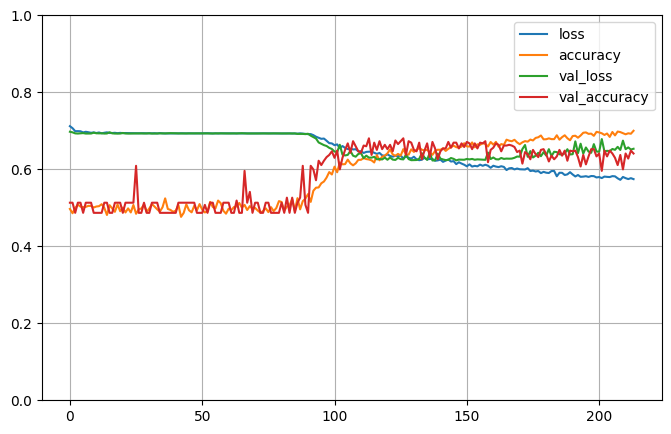


Testing # 1 1
2023-04-29 17:43:43.903151
PREDICT
Test 1:0 259:273 48.68%
Predict 1:0 287:245 53.95%
Test sizes (532, 1025) (532,)
Distrib of scores: 0.51231575 mean 0.14249955 std
Range of scores: 0.14516345 to 0.83174056
Score threshold 0.5
Confusion matrix
 [[174  99]
 [ 71 188]]
Normalized matrix
 [[0.32706767 0.18609023]
 [0.13345865 0.35338346]]
Extreme scores correct, pos:neg 72 60
Extreme scores incorrect pos:neg 32 13


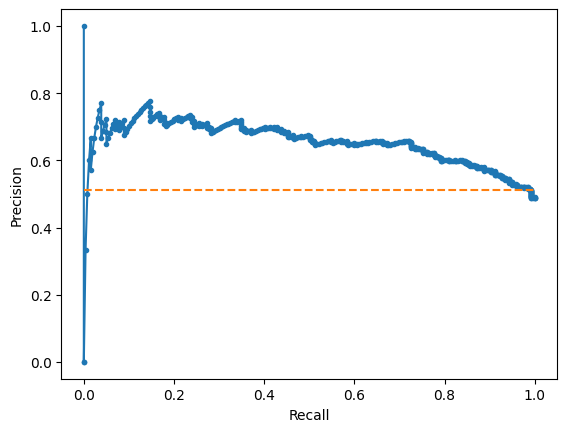

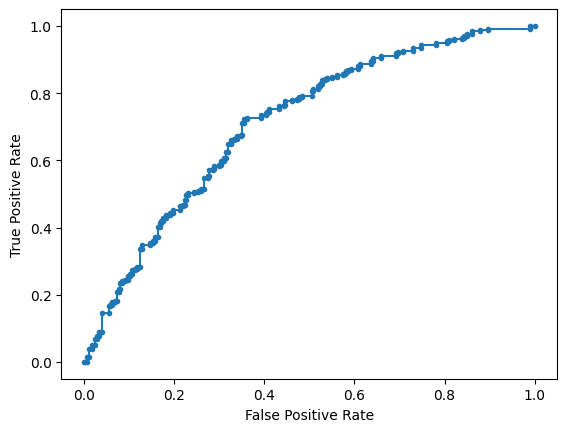

Accuracy: 68.05% Precision: 65.51% Recall: 72.59%
F1: 68.86% MCC: 0.3642
AUPRC: 65.36% AUROC: 71.05%
 accuracy [68.04511278195488]
 precision [65.50522648083623]
 recall [72.58687258687259]
 F1 [68.86446886446886]
 MCC [0.364242447617898]
 AUPRC [65.35931346690185]
 AUROC [71.0495424781139]

Training # 1 2
2023-04-29 17:43:44.626374
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.1.2.validation_genes.txt
Discriminator ZERO -1
Train 1:0 1789:1708 51.16%
Computed class weights: {0: 1.023711943793911, 1: 0.9773616545556176}
Valid 1:0 273:270 50.28%
FIT


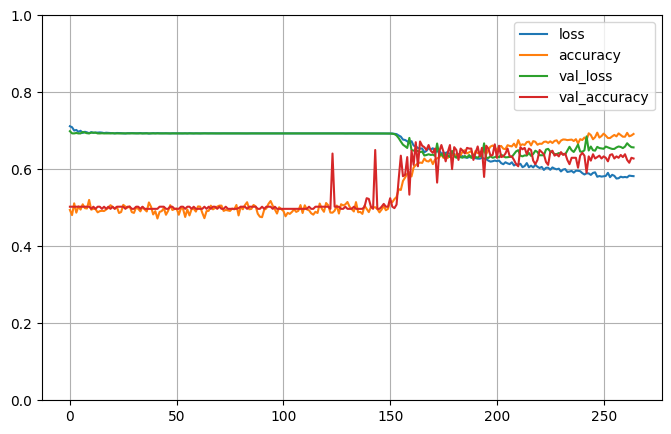


Testing # 1 2
2023-04-29 17:46:23.115458
PREDICT
Test 1:0 273:270 50.28%
Predict 1:0 363:180 66.85%
Test sizes (543, 1025) (543,)
Distrib of scores: 0.5474888 mean 0.112441875 std
Range of scores: 0.22191359 to 0.8425278
Score threshold 0.5
Confusion matrix
 [[136 134]
 [ 44 229]]
Normalized matrix
 [[0.25046041 0.24677716]
 [0.08103131 0.42173112]]
Extreme scores correct, pos:neg 63 19
Extreme scores incorrect pos:neg 28 1


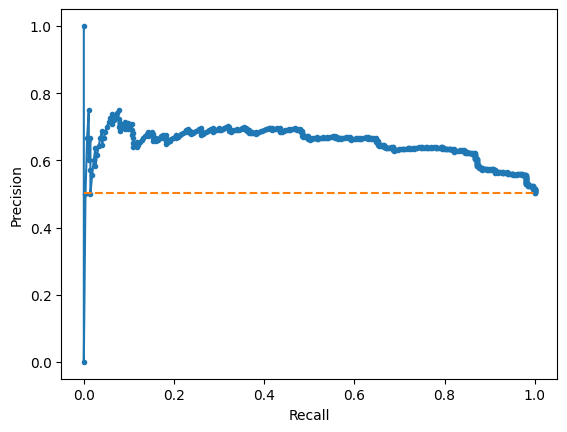

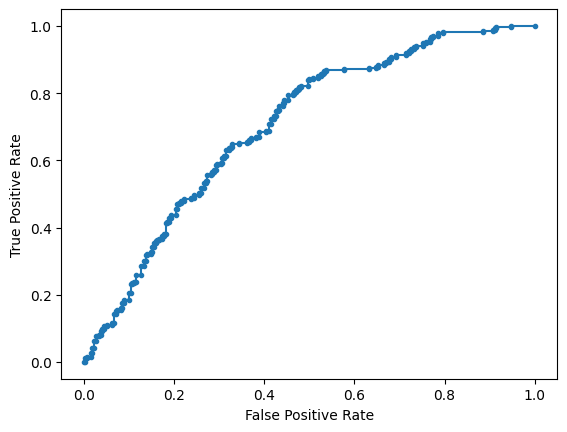

Accuracy: 67.22% Precision: 63.09% Recall: 83.88%
F1: 72.01% MCC: 0.3638
AUPRC: 65.09% AUROC: 70.34%
 accuracy [67.21915285451196]
 precision [63.08539944903582]
 recall [83.88278388278388]
 F1 [72.0125786163522]
 MCC [0.3638096469668528]
 AUPRC [65.09463373712742]
 AUROC [70.33509700176369]

Training # 1 3
2023-04-29 17:46:23.732546
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.1.3.validation_genes.txt
Discriminator ZERO -1
Train 1:0 1810:1688 51.74%
Computed class weights: {0: 1.036137440758294, 1: 0.9662983425414364}
Valid 1:0 251:256 49.51%
FIT


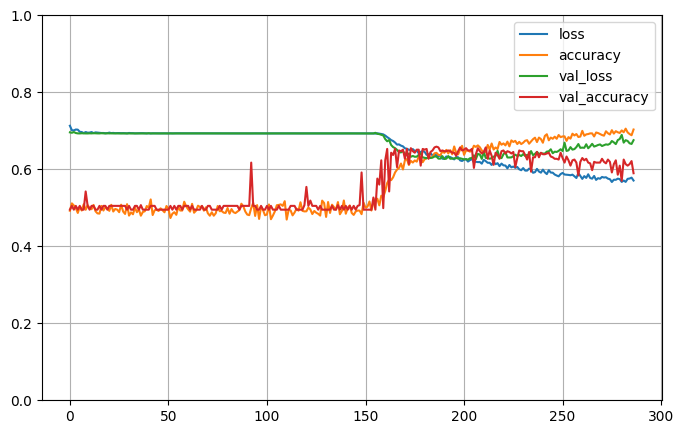


Testing # 1 3
2023-04-29 17:49:47.466969
PREDICT
Test 1:0 251:256 49.51%
Predict 1:0 318:189 62.72%
Test sizes (507, 1025) (507,)
Distrib of scores: 0.5390718 mean 0.1335474 std
Range of scores: 0.10536492 to 0.8522541
Score threshold 0.5
Confusion matrix
 [[136 120]
 [ 53 198]]
Normalized matrix
 [[0.26824458 0.23668639]
 [0.10453649 0.39053254]]
Extreme scores correct, pos:neg 70 41
Extreme scores incorrect pos:neg 28 5


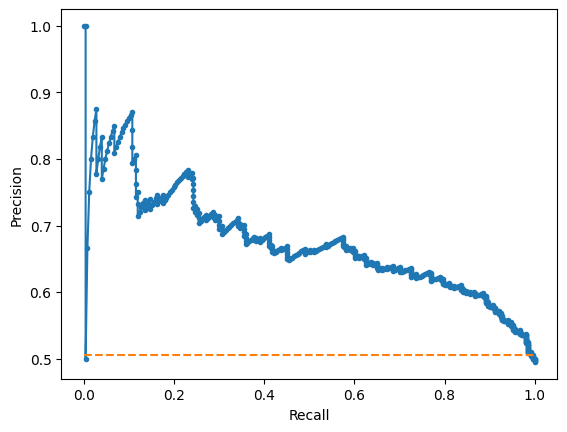

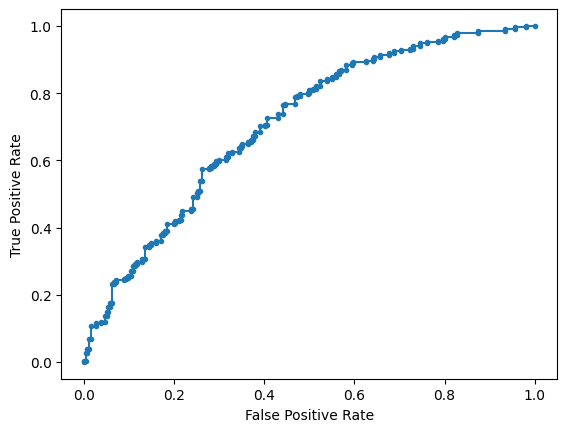

Accuracy: 65.88% Precision: 62.26% Recall: 78.88%
F1: 69.60% MCC: 0.3310
AUPRC: 67.45% AUROC: 70.76%
 accuracy [65.87771203155819]
 precision [62.264150943396224]
 recall [78.88446215139442]
 F1 [69.59578207381372]
 MCC [0.3309716218807082]
 AUPRC [67.45196974673672]
 AUROC [70.75759462151396]

Training # 1 4
2023-04-29 17:49:48.084550
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.1.4.validation_genes.txt
Discriminator ZERO -1
Train 1:0 1778:1720 50.83%
Computed class weights: {0: 1.0168604651162791, 1: 0.9836895388076491}
Valid 1:0 257:245 51.20%
FIT


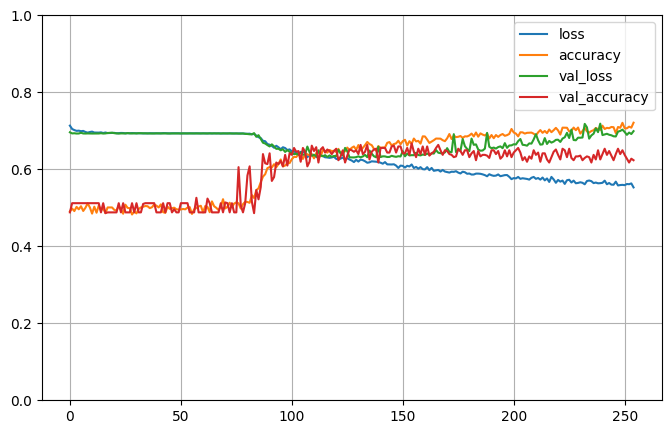


Testing # 1 4
2023-04-29 17:52:22.476481
PREDICT
Test 1:0 257:245 51.20%
Predict 1:0 246:256 49.00%
Test sizes (502, 1025) (502,)
Distrib of scores: 0.4825284 mean 0.18955757 std
Range of scores: 0.031772107 to 0.86063117
Score threshold 0.5
Confusion matrix
 [[167  78]
 [ 89 168]]
Normalized matrix
 [[0.33266932 0.15537849]
 [0.17729084 0.33466135]]
Extreme scores correct, pos:neg 79 88
Extreme scores incorrect pos:neg 27 33


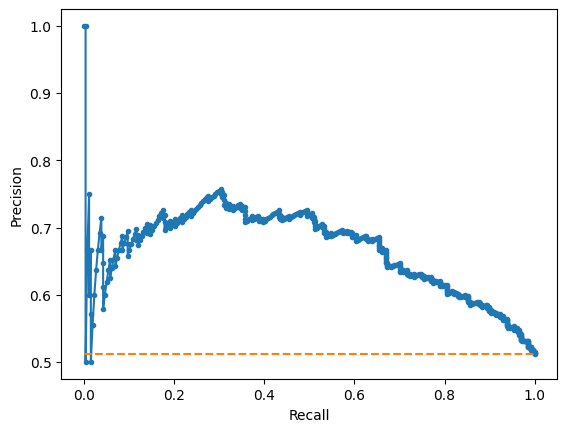

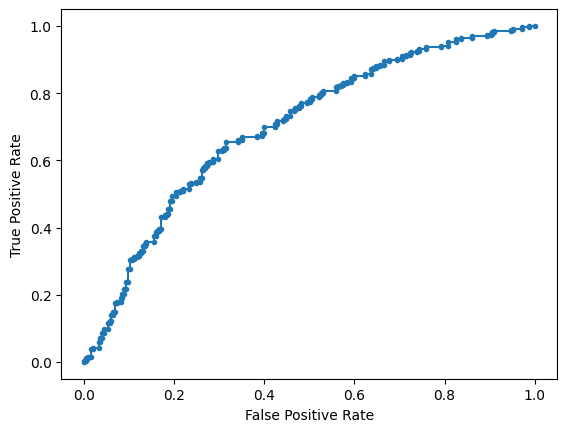

Accuracy: 66.73% Precision: 68.29% Recall: 65.37%
F1: 66.80% MCC: 0.3353
AUPRC: 66.66% AUROC: 69.91%
 accuracy [66.73306772908366]
 precision [68.29268292682927]
 recall [65.36964980544747]
 F1 [66.79920477137176]
 MCC [0.3352998639130433]
 AUPRC [66.6587121137194]
 AUROC [69.90867942507741]

Training # 1 5
2023-04-29 17:52:23.244631
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.1.5.validation_genes.txt
Discriminator ZERO -1
Train 1:0 1785:1713 51.03%
Computed class weights: {0: 1.021015761821366, 1: 0.9798319327731092}
Valid 1:0 281:242 53.73%
FIT


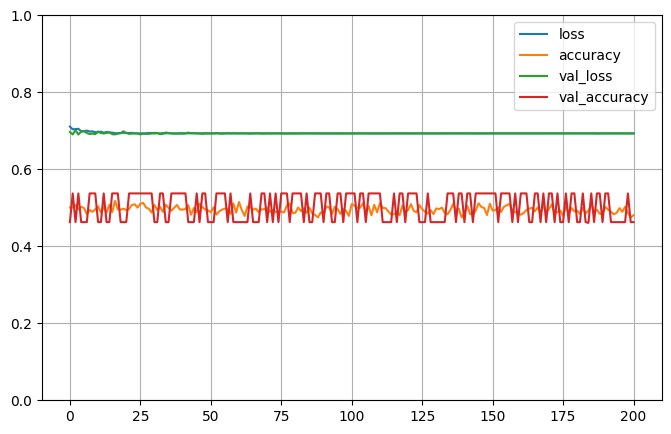


Testing # 1 5
2023-04-29 17:54:46.684982
PREDICT
Test 1:0 281:242 53.73%
Predict 1:0 523:0 100.00%
Test sizes (523, 1025) (523,)
Distrib of scores: 0.5000294 mean 1.82144e-06 std
Range of scores: 0.5000245 to 0.5000377
Score threshold 0.5
Confusion matrix
 [[  0 242]
 [  0 281]]
Normalized matrix
 [[0.         0.46271511]
 [0.         0.53728489]]
Extreme scores correct, pos:neg 0 0
Extreme scores incorrect pos:neg 0 0


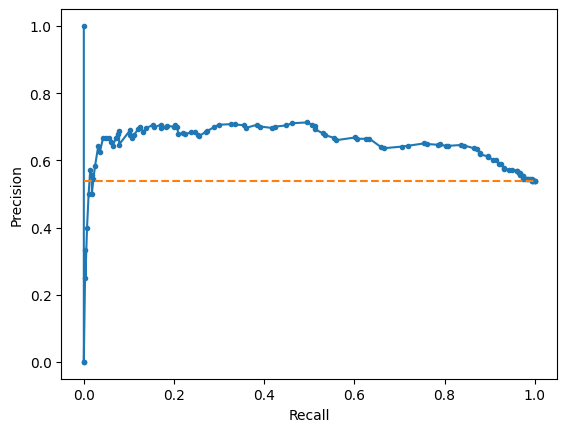

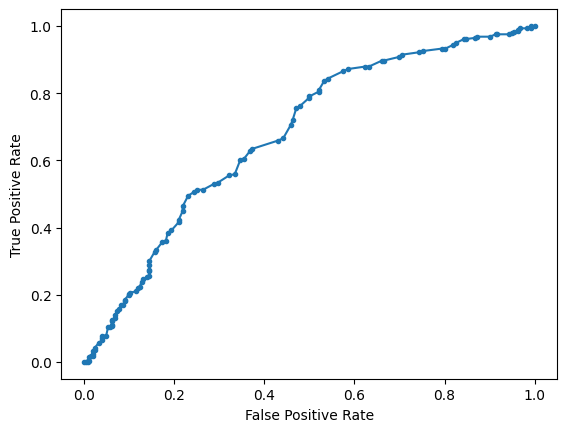

Accuracy: 53.73% Precision: 53.73% Recall: 100.00%
F1: 69.90% MCC: 0.0000
AUPRC: 65.72% AUROC: 67.74%
 accuracy [53.72848948374761]
 precision [53.72848948374761]
 recall [100.0]
 F1 [69.90049751243781]
 MCC [0.0]
 AUPRC [65.71774833487862]
 AUROC [67.73844886915091]

Training # 2 1
2023-04-29 17:54:47.309026
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.2.1.validation_genes.txt
Discriminator ZERO -1
Train 1:0 1807:1690 51.67%
Computed class weights: {0: 1.0346153846153847, 1: 0.9676258992805755}
Valid 1:0 261:256 50.48%
FIT


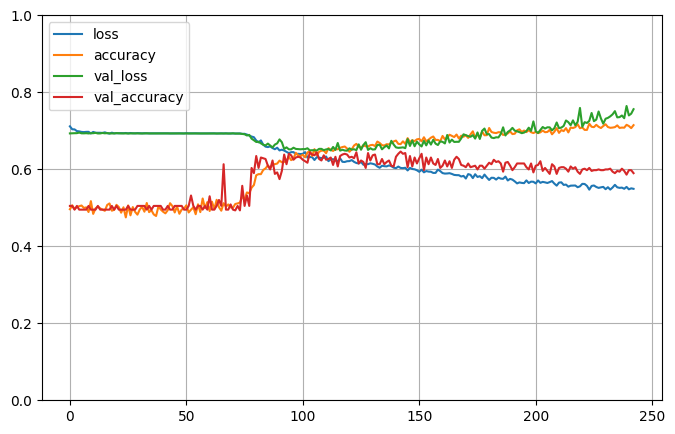


Testing # 2 1
2023-04-29 17:58:10.722402
PREDICT
Test 1:0 261:256 50.48%
Predict 1:0 276:241 53.38%
Test sizes (517, 1025) (517,)
Distrib of scores: 0.5036988 mean 0.19111998 std
Range of scores: 0.019644486 to 0.8954079
Score threshold 0.5
Confusion matrix
 [[157  99]
 [ 84 177]]
Normalized matrix
 [[0.30367505 0.19148936]
 [0.16247582 0.34235977]]
Extreme scores correct, pos:neg 83 82
Extreme scores incorrect pos:neg 39 36


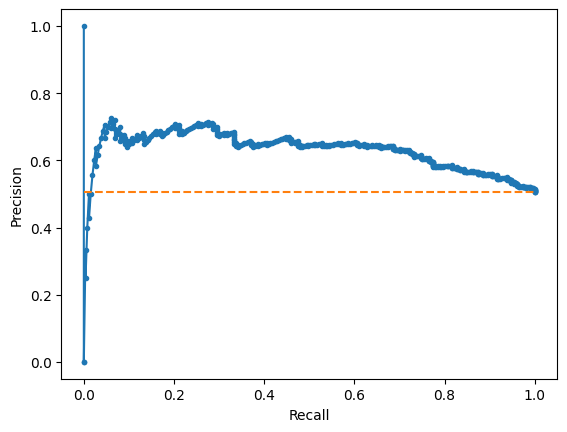

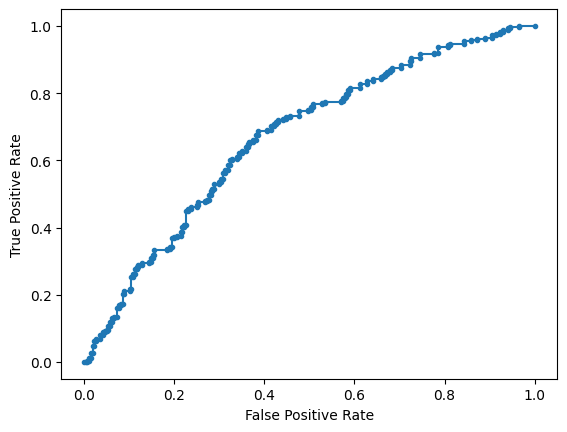

Accuracy: 64.60% Precision: 64.13% Recall: 67.82%
F1: 65.92% MCC: 0.2921
AUPRC: 62.98% AUROC: 66.85%
 accuracy [64.60348162475822]
 precision [64.13043478260869]
 recall [67.81609195402298]
 F1 [65.92178770949721]
 MCC [0.2920986603696674]
 AUPRC [62.976087238349066]
 AUROC [66.84925766283524]

Training # 2 2
2023-04-29 17:58:11.323719
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.2.2.validation_genes.txt
Discriminator ZERO -1
Train 1:0 1794:1703 51.30%
Computed class weights: {0: 1.0267175572519085, 1: 0.9746376811594203}
Valid 1:0 278:258 51.87%
FIT


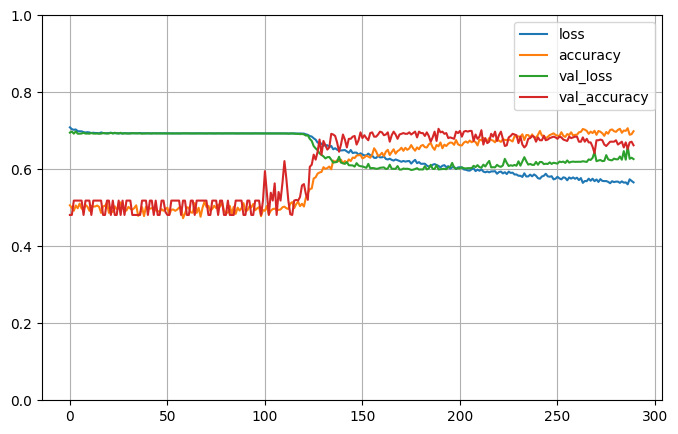


Testing # 2 2
2023-04-29 18:01:34.871835
PREDICT
Test 1:0 278:258 51.87%
Predict 1:0 294:242 54.85%
Test sizes (536, 1025) (536,)
Distrib of scores: 0.50709647 mean 0.19155328 std
Range of scores: 0.020739991 to 0.8666313
Score threshold 0.5
Confusion matrix
 [[171  87]
 [ 71 207]]
Normalized matrix
 [[0.31902985 0.16231343]
 [0.13246269 0.38619403]]
Extreme scores correct, pos:neg 105 92
Extreme scores incorrect pos:neg 32 25


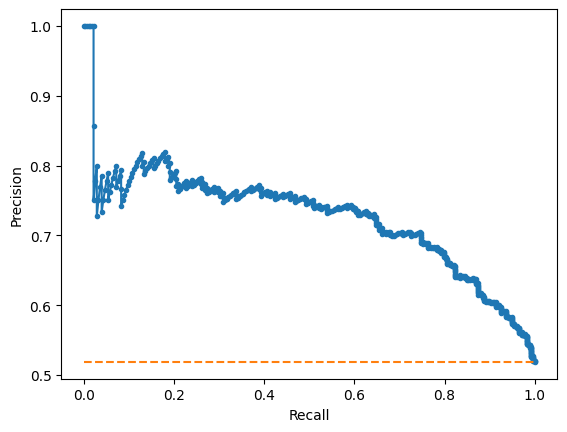

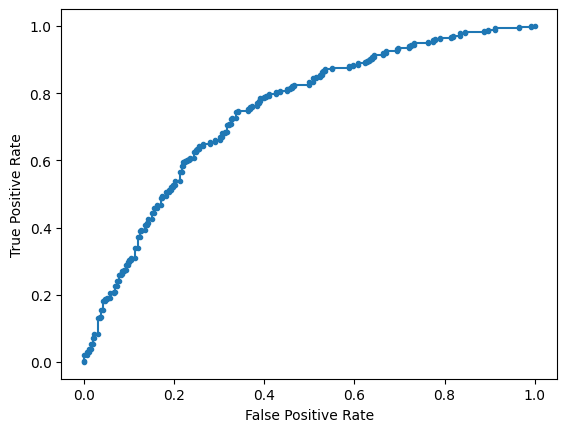

Accuracy: 70.52% Precision: 70.41% Recall: 74.46%
F1: 72.38% MCC: 0.4090
AUPRC: 72.66% AUROC: 74.49%
 accuracy [70.52238805970148]
 precision [70.40816326530613]
 recall [74.46043165467626]
 F1 [72.37762237762237]
 MCC [0.40904078431911084]
 AUPRC [72.65858429735755]
 AUROC [74.49249902403659]

Training # 2 3
2023-04-29 18:01:35.723329
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.2.3.validation_genes.txt
Discriminator ZERO -1
Train 1:0 1771:1727 50.63%
Computed class weights: {0: 1.0127388535031847, 1: 0.9875776397515528}
Valid 1:0 271:245 52.52%
FIT


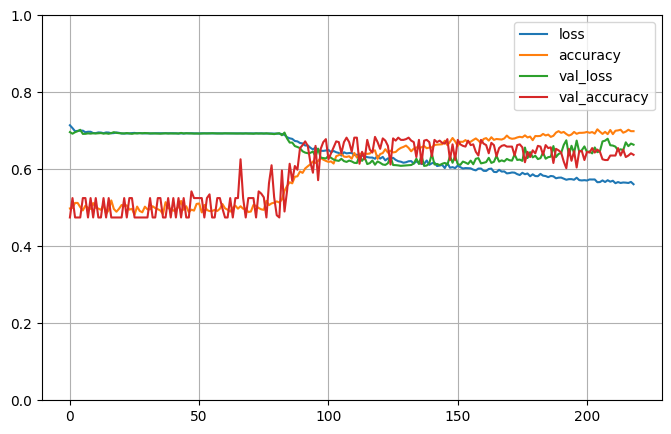


Testing # 2 3
2023-04-29 18:03:47.177642
PREDICT
Test 1:0 271:245 52.52%
Predict 1:0 286:230 55.43%
Test sizes (516, 1025) (516,)
Distrib of scores: 0.50795513 mean 0.16665366 std
Range of scores: 0.058170885 to 0.814757
Score threshold 0.5
Confusion matrix
 [[156  89]
 [ 74 197]]
Normalized matrix
 [[0.30232558 0.17248062]
 [0.14341085 0.38178295]]
Extreme scores correct, pos:neg 75 78
Extreme scores incorrect pos:neg 34 21


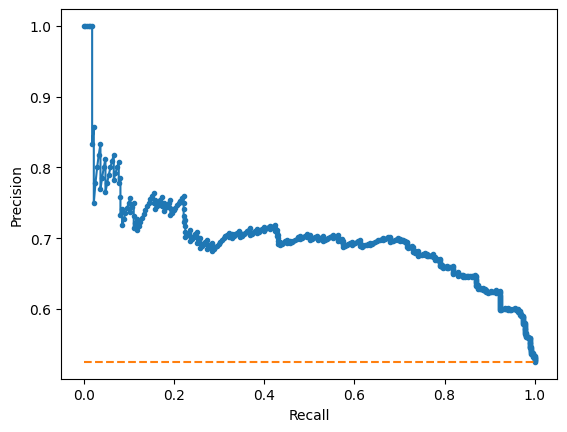

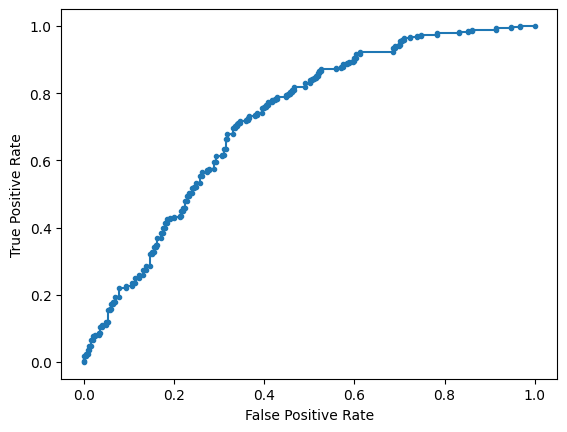

Accuracy: 68.41% Precision: 68.88% Recall: 72.69%
F1: 70.74% MCC: 0.3654
AUPRC: 69.91% AUROC: 72.19%
 accuracy [68.4108527131783]
 precision [68.88111888111888]
 recall [72.69372693726937]
 F1 [70.73608617594255]
 MCC [0.3653680556973421]
 AUPRC [69.9089881007873]
 AUROC [72.19368928383162]

Training # 2 4
2023-04-29 18:03:47.792380
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.2.4.validation_genes.txt
Discriminator ZERO -1
Train 1:0 1816:1682 51.92%
Computed class weights: {0: 1.039833531510107, 1: 0.9631057268722467}
Valid 1:0 241:267 47.44%
FIT


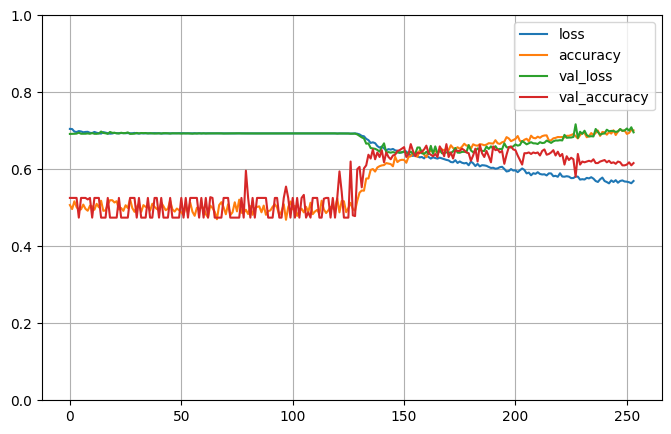


Testing # 2 4
2023-04-29 18:06:22.612546
PREDICT
Test 1:0 241:267 47.44%
Predict 1:0 287:221 56.50%
Test sizes (508, 1025) (508,)
Distrib of scores: 0.5286795 mean 0.15018187 std
Range of scores: 0.15924595 to 0.88275224
Score threshold 0.5
Confusion matrix
 [[159 108]
 [ 62 179]]
Normalized matrix
 [[0.31299213 0.21259843]
 [0.12204724 0.3523622 ]]
Extreme scores correct, pos:neg 78 50
Extreme scores incorrect pos:neg 40 14


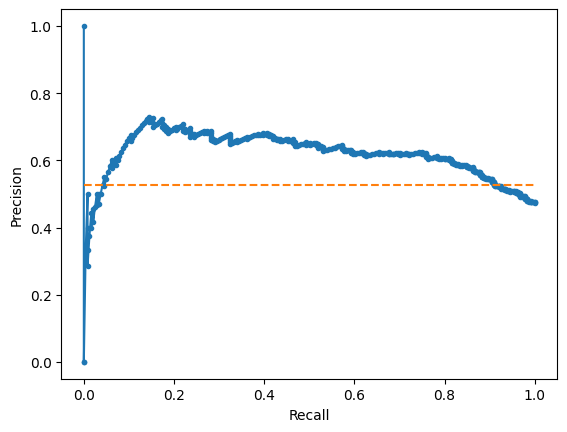

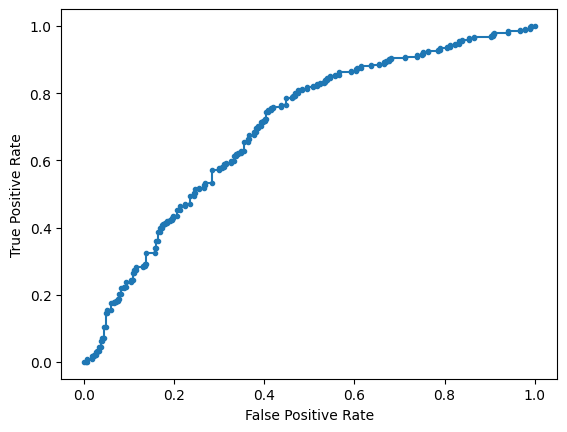

Accuracy: 66.54% Precision: 62.37% Recall: 74.27%
F1: 67.80% MCC: 0.3407
AUPRC: 61.87% AUROC: 69.62%
 accuracy [66.53543307086615]
 precision [62.36933797909408]
 recall [74.27385892116183]
 F1 [67.80303030303031]
 MCC [0.3406884687666895]
 AUPRC [61.86679390221881]
 AUROC [69.61629912816448]

Training # 2 5
2023-04-29 18:06:23.246639
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.2.5.validation_genes.txt
Discriminator ZERO -1
Train 1:0 1784:1714 51.00%
Computed class weights: {0: 1.0204200700116686, 1: 0.9803811659192825}
Valid 1:0 270:260 50.94%
FIT


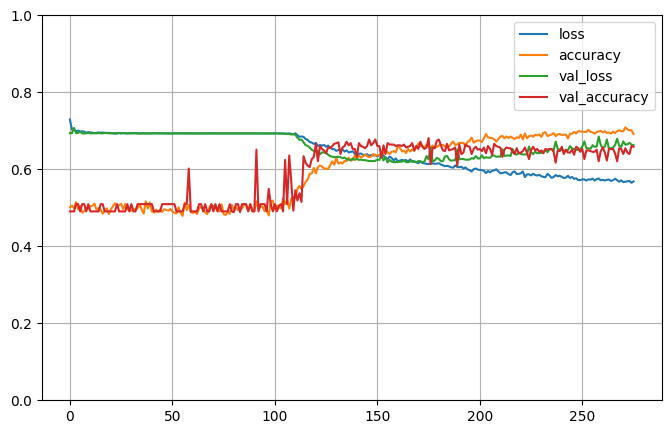


Testing # 2 5
2023-04-29 18:09:46.703531
PREDICT
Test 1:0 270:260 50.94%
Predict 1:0 349:181 65.85%
Test sizes (530, 1025) (530,)
Distrib of scores: 0.5576046 mean 0.16380727 std
Range of scores: 0.06781235 to 0.8772865
Score threshold 0.5
Confusion matrix
 [[136 124]
 [ 45 225]]
Normalized matrix
 [[0.25660377 0.23396226]
 [0.08490566 0.4245283 ]]
Extreme scores correct, pos:neg 116 49
Extreme scores incorrect pos:neg 41 13


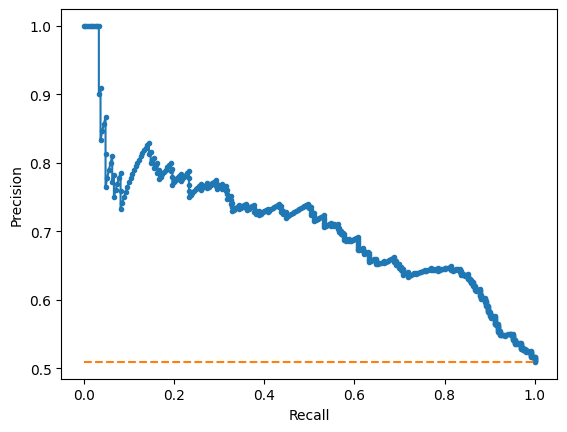

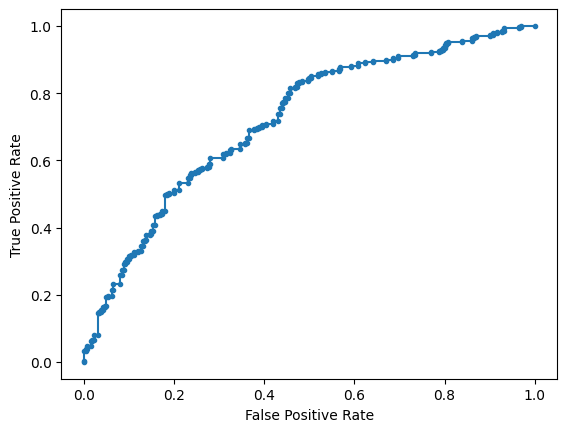

Accuracy: 68.11% Precision: 64.47% Recall: 83.33%
F1: 72.70% MCC: 0.3757
AUPRC: 70.81% AUROC: 71.93%
 accuracy [68.11320754716981]
 precision [64.46991404011462]
 recall [83.33333333333334]
 F1 [72.69789983844912]
 MCC [0.3757221063431894]
 AUPRC [70.80892995386081]
 AUROC [71.93162393162393]
2023-04-29 18:09:47.559900


In [7]:
print(datetime.now())

accuracy=[]
precision=[]
recall=[]
f1=[]
mcc=[]
auprc=[]
auroc=[]

loader = DataLoader(K,ALPHABET)
filepath = DATA_DIR+RCI_FILE_TRAIN
print("Load RCI from",filepath)
gene_to_rci = loader.load_gene_rci_values(filepath,EXCLUSIONS)
print('Num RCI:', len(gene_to_rci.keys()))
filepath = DATA_DIR+SEQ_FILE_TRAIN
print('Load sequence from',filepath)
allids,allseq = loader.load_spectra(filepath)  # for MLP (load_sequence() for CNN)
print('Loaded',len(allseq),'sequences.')
test_gene_to_rci = None
test_allids = None
test_allseq = None
if SEQ_FILE_TEST is not None:
    # Train on the entire train set (no cross-validation).
    # Evaluate with the test files.
    test_loader = DataLoader(K,ALPHABET)
    filepath = DATA_DIR+RCI_FILE_TEST
    print("Load RCI from",filepath)
    test_gene_to_rci = test_loader.load_gene_rci_values(filepath,EXCLUSIONS)
    print('Num RCI:', len(test_gene_to_rci.keys()))
    filepath = DATA_DIR+SEQ_FILE_TEST
    print('Load sequence from',filepath)
    test_allids,test_allseq = test_loader.load_spectra(filepath)
    print('Loaded',len(test_allseq),'sequences.')

for repeat in range(REPEATS):
    for fold in range(FOLDS):
        show_r = repeat+1  # display one-based counting
        show_f = fold+1    # display one-based counting

        print()
        print("Training #",show_r,show_f)
        print(datetime.now())
        builder = ModelBuilder(ALPHABET)
        cvdo = CrossValidator(EPOCHS,RCI_THRESHOLD_VALUE)
        cvdo.set_model_builder(builder)
        cvdo.set_threshold_mechanism(RCI_THRESHOLD_MECHANISM)
        
        if SEQ_FILE_TEST is None:
            # Train on 80% and evaluate on 20%.
            separator = Separator()
            separator.set_middle(FILTER_TEST,FILTER_TAILS_TEST,FILTER_MIDDLE_TEST,\
                                 FILTER_TRAIN,FILTER_TAILS_TRAIN,FILTER_MIDDLE_TRAIN,\
                                 MIDDLE_LOW,MIDDLE_HIGH)
            separator.load(DATA_DIR,show_r,show_f)
            separator.process(allids,allseq,gene_to_rci)
            train_allids,test_allids = separator.get_ids()
            train_allseq,test_allseq = separator.get_seq()
            train_gene_to_rci,test_gene_to_rci = separator.get_rci()
            cvdo.train_new_model(
                train_allids,train_allseq,train_gene_to_rci,
                test_allids,test_allseq,test_gene_to_rci)
            if SAVE_MODEL_FILENAME is not None:
                filename1 = f"{SAVE_MODEL_FILENAME}.{show_r}.{show_f}.model"
                filename2 = f"{SAVE_DESCRIM_FILENAME}.{show_r}.{show_f}.pickle"
                model,discrim = cvdo.get_models()
                save_model(model,discrim,filename1,filename2)
        else:
            # Train on the entire train set (no cross-validation).
            # Evaluate with the test files.
            train_allids = allids
            train_allseq = allseq
            train_gene_to_rci = gene_to_rci
            BREAK = True
            if LOAD_MODEL_FILENAME is not None:
                filename1 = LOAD_MODEL_FILENAME
                filename2 = LOAD_DESCRIM_FILENAME
                model, descrim = load_model(filename1, filename2)
                cvdo.set_models(model, descrim)
            else:
                cvdo.train_new_model(
                    train_allids,train_allseq,train_gene_to_rci,
                    None,None,None)

        print()
        print("Testing #",show_r,show_f)
        print(datetime.now())
        cvdo.reset_statistics()
        cvdo.test_without_training(
            test_allids,test_allseq,test_gene_to_rci)
        cv_accuracy,cv_precision,cv_recall,cv_f1,cv_mcc,cv_auprc,cv_auroc=\
            cvdo.get_statistics()

        print(" accuracy" ,  cv_accuracy)
        print(" precision" , cv_precision)
        print(" recall" ,    cv_recall)
        print(" F1" ,        cv_f1)
        print(" MCC" ,       cv_mcc)
        print(" AUPRC" ,     cv_auprc)
        print(" AUROC" ,     cv_auroc)

        accuracy.append(cv_accuracy)
        precision.append(cv_precision)
        recall.append(cv_recall)
        f1.append(cv_f1)
        mcc.append(cv_mcc)
        auprc.append(cv_auprc)
        auroc.append(cv_auroc)
        if BREAK: break
    if BREAK: break
print(datetime.now())

In [8]:
def STD (values):
    # ddof=1 reduces bias when extrapolating from sample to population
    return np.std(values,ddof=1)

print(" accuracy mean %.2f%% std %.2f" %  (np.mean(accuracy),  STD(accuracy)))
print(" precision mean %.2f%% std %.2f" % (np.mean(precision), STD(precision)))
print(" recall mean %.2f%% std %.2f" %    (np.mean(recall),    STD(recall)))
print(" F1 mean %.2f%% std %.2f" %        (np.mean(f1),        STD(f1)))
print(" MCC mean %.4f std %.4f" %       (np.mean(mcc),       STD(mcc)))
print(" AUPRC mean %.2f%% std %.2f" %     (np.mean(auprc),     STD(auprc)))
print(" AUROC mean %.2f%% std %.2f" %     (np.mean(auroc),     STD(auroc)))

print(" accuracy"  , accuracy)
print(" precision" , precision)
print(" recall"    , recall)
print(" F1"        , f1)
print(" MCC"       , mcc)
print(" AUPRC"     , auprc)
print(" AUROC"     , auroc)



 accuracy mean 65.98% std 4.59
 precision mean 64.31% std 4.68
 recall mean 77.33% std 9.95
 F1 mean 69.67% std 2.35
 MCC mean 0.3177 std 0.1159
 AUPRC mean 66.85% std 3.43
 AUROC mean 70.49% std 2.19
 accuracy [[68.04511278195488], [67.21915285451196], [65.87771203155819], [66.73306772908366], [53.72848948374761], [64.60348162475822], [70.52238805970148], [68.4108527131783], [66.53543307086615], [68.11320754716981]]
 precision [[65.50522648083623], [63.08539944903582], [62.264150943396224], [68.29268292682927], [53.72848948374761], [64.13043478260869], [70.40816326530613], [68.88111888111888], [62.36933797909408], [64.46991404011462]]
 recall [[72.58687258687259], [83.88278388278388], [78.88446215139442], [65.36964980544747], [100.0], [67.81609195402298], [74.46043165467626], [72.69372693726937], [74.27385892116183], [83.33333333333334]]
 F1 [[68.86446886446886], [72.0125786163522], [69.59578207381372], [66.79920477137176], [69.90049751243781], [65.92178770949721], [72.37762237762237]